<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="200px">

# **Taller 03:  Statistics**

## **Outline**

1. [Ejercicio 1.](#eje1)
2. [Ejercicio 2.](#eje2)
2. [Ejercicio 3.](#eje3)
2. [Ejercicio 4.](#eje4)
2. [Ejercicio 5.](#eje5)

In [ ]:
#@title **Execute this cell**
#@markdown Please include your student id
import sys
import inspect

group_id = "IA1-20232-E1" #@param {type:"string"}
assignment_id = group_id +'.taller_statistic'
student_id = "2204122" #@param {type:"string"}
"""
Put your student ID here

Example: student_id =  '2152145'
"""

"\nPut your student ID here\n\nExample: student_id =  '2152145'\n"

In [ ]:
 #@title **Execute this cell**
#@markdown **UTILS**
#@markdown Please dont modify any line in this cell

import os
import json
import requests
from collections import namedtuple


Config = namedtuple('Config', ['server_name'])
config = Config(server_name='https://bivlabgrader.azurewebsites.net/api')


def check_solution_and_evaluate(assignment_id: str, student_func_str: str):

    # Set the endpoint and payload.
    payload = {
        'func_str': student_func_str,
        'assignment_id': assignment_id,
        'student_id': student_id
    }
    endpoint_url = config.server_name + '/CheckAndEvaluateSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.post(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def pprint_json_response(response, indent=0):
    """Pretty print the response."""
    for key, value in response.items():
        print('\t' * indent + str(key.capitalize()))

        # If dictionary, do a recurrent call.
        if isinstance(value, dict):
            pprint_json_response(value, indent + 1)
        else:
            # Enumerate elements if list.
            if isinstance(value, list):
                if len(value) == 1:
                    print('\t' * (indent + 1) + str(value[0]))
                else:
                    for i, e in enumerate(value, start=1):
                        print('\t' * (indent + 1) + f'{i}. {e}')
            else:
                print('\t' * (indent + 1) + str(value))

In [ ]:
#@title **Import libraries**
import numpy as np
import pandas as pd
import scipy.stats as stats

In [ ]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive

path_ai = "ai-uis-student" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/ai-uis-student


---
## **Comportamiento del producto interno Bruto a nivel Mundial**

En los siguientes puntos vamos a explorar un dataset que describe el  crecimiento de la población mundial (`pop`) por país (`country`), y además describe el comportamiento del producto interno bruto (`gdpPercap`) y la experanza de vida (`lifeExp`).

---

country  year         pop continent  lifeExp   gdpPercap
0  Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1  Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2  Afghanistan  1962  10267083.0      Asia   31.997  853.100710
3  Afghanistan  1967  11537966.0      Asia   34.020  836.197138
4  Afghanistan  1972  13079460.0      Asia   36.088  739.981106

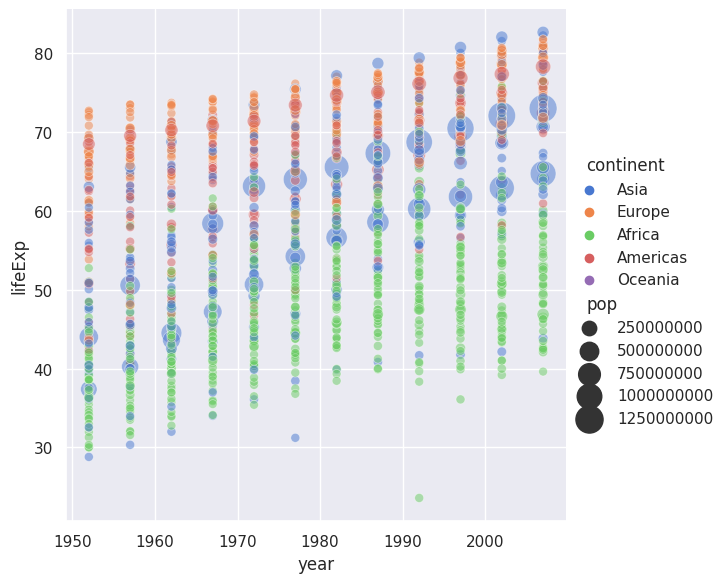

In [ ]:
#@title **PIB dataset**
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

data = pd.read_csv('https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/-/raw/master/data/gapminder-FiveYearData.csv?ref_type=heads')
sns.relplot(x="year", y="lifeExp", hue="continent", size="pop",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)
data.head()

---
# **Ejercicio 1**  <a name="eje1"></a>
---

Realice una función que devuelva tres matrices de correlación de (3x3) entre  las columnas ``` 'pop', 'lifeExp', 'gdpPercap' ``` del dataset PIB.  Las matrices deben ser calculadas usando los metodos de  Pearson, Kendall, Spearman’s, respectiamente.

In [ ]:
def PIB_matrix_correlation(data):
  #  Importing allowed libraries
  import scipy.stats as stats

  "Your code here"

  return corr_per, corr_ken, corr_spear

In [ ]:
#@title **check your answer**
corr_per, corr_ken, corr_spear = PIB_matrix_correlation(data)
corr_per

pop   lifeExp  gdpPercap
pop        1.000000  0.064955  -0.025600
lifeExp    0.064955  1.000000   0.583706
gdpPercap -0.025600  0.583706   1.000000

In [ ]:
 #@title **send your answer**
student_func_str = inspect.getsource(PIB_matrix_correlation)
r = check_solution_and_evaluate(assignment_id, student_func_str)

### **End professor**


---
# **Ejercicio 2**  <a name="eje2"></a>
---

Construya una función que para las columnas `'lifeExp' y 'pop'` del dataset del PIB calcule las siguientes distribuciones:

- La distribución normal  usando la media y desviación estandar respectivos de la columna de datos.  
- La distribucion de Poisson, recuerde que la media es igual a la varianza en esta distribución
- Devolver 1000 datos aleatorios para cada funcion calculada



In [ ]:
#@title **code student**
def PIB_distributions(data):
  #  Importing allowed libraries
  import pandas as pd
  import numpy as np
  import scipy.stats as stats
  np.random.seed(seed=42)

  "Your code here"

  return rsv_norm_pop, rsv_poisson_pop,rsv_norm_lifeExp, rsv_poisson_lifeExp

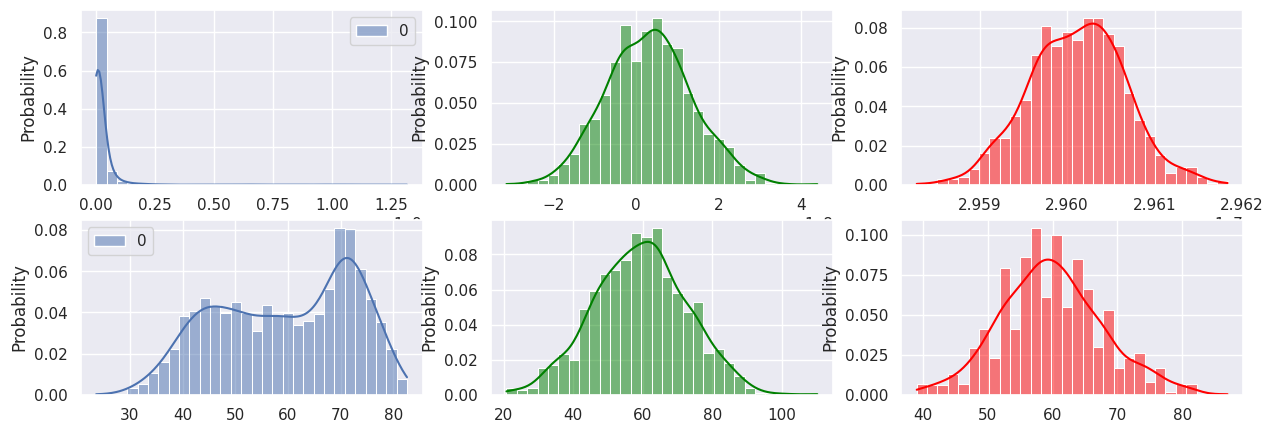

In [ ]:
#@title **check your answer**
rsv_norm_pop, rsv_poisson_pop,rsv_norm_lifeExp, rsv_poisson_lifeExp = PIB_distributions(data)

plt.figure(figsize=(15,5))
plt.subplot(2,3, 1);
ax=sns.histplot(data[['pop']].values, kde=True, color='blue', bins=30, stat='probability');
plt.subplot(2,3, 2);
ax=sns.histplot(rsv_norm_pop, kde=True, color='green', bins=30, stat='probability');
plt.subplot(2,3,3);
ax=sns.histplot(rsv_poisson_pop, kde=True, color='red', bins=30, stat='probability');
plt.subplot(2,3, 4);
sns.histplot(data[['lifeExp']].values, kde=True, color='blue', bins=30, stat='probability');
plt.subplot(2,3, 5);
sns.histplot(rsv_norm_lifeExp, kde=True, color='green', bins=30, stat='probability');
plt.subplot(2,3, 6);
sns.histplot(rsv_poisson_lifeExp, kde=True, color='red', bins=30, stat='probability');

In [ ]:
 #@title **send your answer**
student_func_str = inspect.getsource(PIB_distributions)
r = check_solution_and_evaluate(assignment_id, student_func_str)

---
# **Ejercicio 3**  <a name="eje3"></a>
---
Construya una función que calcula una distribución normal para las columnas `'lifeExp' y 'pop'` del dataset del PIB. Debe retornnar los valores de `ean(‘m’), variance(‘v’), skew(‘s’), and/or kurtosis(‘k’)` para cada dostribución.






In [ ]:
#@title **code student**
def PIB_moments(data):
  #  Importing allowed libraries
  import pandas as pd
  import numpy as np
  import scipy.stats as stats
  np.random.seed(42)

  "Your code here"

  return [mean_pop, var_pop, skew_pop, kurt_pop], [mean_lifeExp, var_lifeExp, skew_lifeExp, kurt_lifeExp]

In [ ]:
#@title **check your answer**
[mean_pop, var_pop, skew_pop, kurt_pop], [mean_lifeExp, var_lifeExp, skew_lifeExp, kurt_lifeExp] = PIB_moments(data)
print([mean_pop, var_pop, skew_pop, kurt_pop], [mean_lifeExp, var_lifeExp, skew_lifeExp, kurt_lifeExp])

[29601212.32511736, 1.1262885485934526e+16, 0.0, 0.0] [59.474439366197174, 166.7537463337001, 0.0, 0.0]


In [ ]:
 #@title **send your answer**
student_func_str = inspect.getsource(PIB_moments)
r = check_solution_and_evaluate(assignment_id, student_func_str)

---
# **Ejercicio 4**  <a name="eje4"></a>
---

Realice una función usando la columna `gdpPercap` del dataset del PIB que haga el LTC de forma analitica , es decir usando la formula $ \mathcal{N} \left ( \mu(X), \frac{\sigma(X)}{\sqrt{N}} \right )$.

- Realiza la aproximación LTC para N= [15, 30, 60]
- Contruya las distribuciones normales para cada N
- Devuelva 10000 numeros aleatorios para cada distribución de N



In [ ]:
#@title **code student**
def analytical_LTC(data):
  #  Importing allowed libraries
  import pandas as pd
  import numpy as np
  import scipy.stats as stats
  # Let's put a seed.
  np.random.seed(42)

  samples = []

  "Your code here"

  return samples

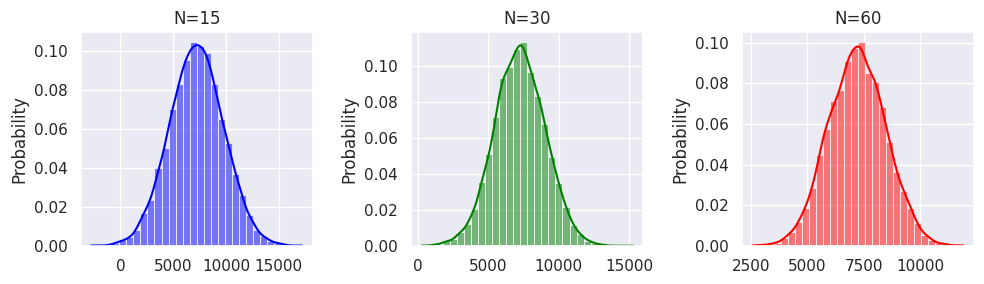

In [ ]:
#@title **check your answer**
samples = analytical_LTC(data)
plt.figure(figsize=(10,3))
plt.subplot(1,3, 1);
plt.title('N=15')
ax=sns.histplot(samples[0], kde=True, color='blue', bins=30, stat='probability');
plt.subplot(1,3, 2);
plt.title('N=30')
ax=sns.histplot(samples[1], kde=True, color='green', bins=30, stat='probability');
plt.subplot(1,3,3);
plt.title('N=60')
ax=sns.histplot(samples[2], kde=True, color='red', bins=30, stat='probability');
plt.tight_layout()

In [ ]:
 #@title **send your answer**
student_func_str = inspect.getsource(analytical_LTC)
r = check_solution_and_evaluate(assignment_id, student_func_str)

---
# **Ejercicio 5**  <a name="eje5"></a>
---
Realice una función usando la columna `gdpPercap` del dataset del PIB que haga el LTC de forma computacional.

- Realiza la aproximación LTC para N= [15, 30, 60]
- Contruya las distribuciones normales para cada N
- Devuelva 10000 numeros aleatorios para cada distribución de N




In [ ]:
#@title **code student**
def computational_LTC(data):
  #  Importing allowed libraries
  import pandas as pd
  import numpy as np
  import scipy.stats as stats
  np.random.seed(42)

  samples = []

  "Your code here"

  return samples

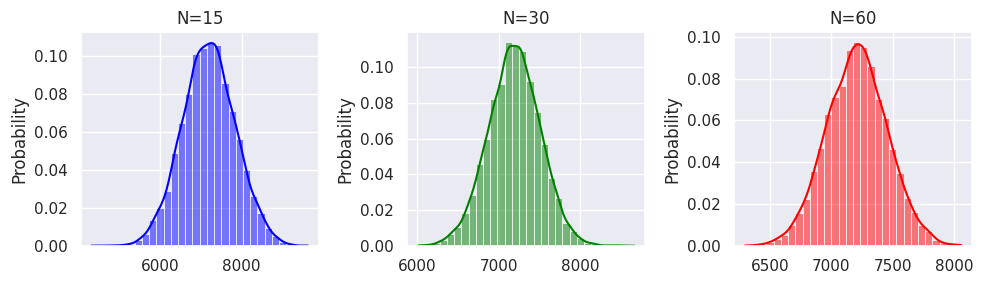

In [ ]:
#@title **check your answer**
samples = computational_LTC(data)
plt.figure(figsize=(10,3))
plt.subplot(1,3, 1);
plt.title('N=15')
ax=sns.histplot(samples[0], kde=True, color='blue', bins=30, stat='probability');
plt.subplot(1,3, 2);
plt.title('N=30')
ax=sns.histplot(samples[1], kde=True, color='green', bins=30, stat='probability');
plt.subplot(1,3,3);
plt.title('N=60')
ax=sns.histplot(samples[2], kde=True, color='red', bins=30, stat='probability');
plt.tight_layout()

In [ ]:
 #@title **send your answer**
student_func_str = inspect.getsource(computational_LTC)
r = check_solution_and_evaluate(assignment_id, student_func_str)

---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;"/>